# 1.进行数据预处理

# 1.1导入所需模块

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


## 1.2读取MNIST数据

In [2]:
(x_Train,y_Train), (x_Test,y_Test) = mnist.load_data()

## 1.3将 features（数字图像特征值）转换为四维矩阵

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

## 1.4将 features（数字图像特征值）标准化

In [4]:
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

## 1.5label（数字真实的值）以 One-Hot-Encoding进行转换

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 2.建立模型

## 2.1导入所需模块

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

## 2.2建立 keras 的 Sequential 模型

In [7]:
model = Sequential()

## 2.3建立卷积层 1与池化层 1
### 2.3.1建立卷积层 1
使用下列程序代码建立卷积层 1。输入的数字图像大小为 28×28 ，进行第 1 次卷积运算会产生16个图像，卷积运算并不会改变图像大小,所以图像大小仍是28 ×28。

In [8]:
model.add(Conv2D(filters = 16,           # 建立16个滤镜
                 kernel_size = (5,5),    # 每一个滤镜5×5大小
                 padding = 'same',       # 此设置让卷积运算产生的卷积图像大小不变
                 input_shape = (28,28,1),# 第一，二维：代表输入的图像形状为28×28。第三维：因为是单色灰度图像，所以是最后维数值是1
                 activation = 'relu'))   # 设置ReLu激活函数

### 2.3.2建立池化层 1
下面的程序代码建立池化层 1，输入参数 pool_size = (2,2)，执行第 1 次缩减采样，将16个 28×28 的图像缩小为16个 14×14 的图像。

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

## 2.4建立卷积层 2与池化层 2

### 2.4.1建立卷积层 2

使用下列程序代码建立卷积层 2。输入的数字图像大小为 14×14 ，进行第 2 次卷积运算会由16个图像转换成36个图像，卷积运算并不会改变图像大小,所以图像大小仍是14×14。

In [10]:
model.add(Conv2D(filters = 36,
                 kernel_size = (5,5),
                 padding = 'same',
                 input_shape = (14,14,1),
                 activation = 'relu'))

### 2.4.2建立池化层 2，并加入 Dropout 避免过度拟合
下面的程序代码建立池化层 2，输入参数 pool_size = (2,2)，执行第 2 次缩减采样，将36个 14×14 的图像缩小为36个 7×7 的图像。

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

下面的程序代码把 Dropout(0.25)层加入模型中。其功能是，每次训练迭代时，会随机在神经网络中放弃 25% 的神经元，以避免过度拟合。

In [12]:
model.add(Dropout(0.25))

## 2.5建立神经网络（平坦层、隐藏层、输出层）
### 2.5.1建立平坦层
以下程序代码建立平坦层，将之前的步骤已经建立的池化层 2，共有 36 个 7×7 的图像转换为一维的向量，长度是 36×7×7=1764，就是 1764 个Float数，正好对应1764个神经元。

In [13]:
model.add(Flatten())

### 2.5.2建立隐藏层
下面的程序代码建立隐藏，共有 128 个神经元。

In [14]:
model.add(Dense(units = 128,activation = 'relu'))

并且把 Dropout 层加入模型中。Dropout(0.5)的功能是，每次训练迭代时，会随机地在神经网络中放弃50%的神经元，以避免过度拟合。

In [15]:
model.add(Dropout(0.5))

### 2.5.3建立输出层
最后建立输出层，共有 10 个神经元，对应 0-9 共 10 个数字。并使用 softmax 激活函数进行转换，softmax 可以将神经元的输出转换为预测每一个数字的概率。

In [16]:
model.add(Dense(10,activation='softmax'))

### 2.6查看模型的摘要

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 3.进行训练
建立好深度学习模型后，就可以使用反向传播算法进行训练。
## 3.1定义训练方式
在训练模型之前，我们必须使用 compile 方法对训练模型进行设置，如以下指令：

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## 3.2开始训练
执行训练的程序代码如下：

In [19]:
train_history = model.fit(x = x_Train4D_normalize,
                          y = y_TrainOneHot,validation_split = 0.2,
                          epochs = 10,batch_size = 300,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 46s - loss: 0.4896 - acc: 0.8469 - val_loss: 0.0973 - val_acc: 0.9722
Epoch 2/10
 - 46s - loss: 0.1419 - acc: 0.9580 - val_loss: 0.0637 - val_acc: 0.9805
Epoch 3/10
 - 48s - loss: 0.1032 - acc: 0.9691 - val_loss: 0.0517 - val_acc: 0.9843
Epoch 4/10
 - 45s - loss: 0.0846 - acc: 0.9752 - val_loss: 0.0462 - val_acc: 0.9857
Epoch 5/10
 - 42s - loss: 0.0722 - acc: 0.9778 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 6/10
 - 42s - loss: 0.0639 - acc: 0.9812 - val_loss: 0.0401 - val_acc: 0.9888
Epoch 7/10
 - 41s - loss: 0.0565 - acc: 0.9831 - val_loss: 0.0411 - val_acc: 0.9879
Epoch 8/10
 - 42s - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0330 - val_acc: 0.9903
Epoch 9/10
 - 41s - loss: 0.0457 - acc: 0.9860 - val_loss: 0.0345 - val_acc: 0.9898
Epoch 10/10
 - 42s - loss: 0.0423 - acc: 0.9870 - val_loss: 0.0329 - val_acc: 0.9904


acc:使用训练数据计算准确率。 loss:使用训练数据计算误差。 
val_acc:使用验证数据计算准确率。 val_loss:使用验证数据计算误差。

## 3.2画出准确率执行结果
之前的训练步骤会将每一个训练周期的准确率与误差记录在 train_history 变量中。我们可以使用下面的程序代码读取 trian_history ，画出准确率的执行结果。

In [20]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation,loc_num=0):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc=loc_num) # 为了适应不同的图例的位置，不妨碍图里的数据，调用的时候需传入loc_num参数
    
show_train_history(train_history,'acc','val_acc',4)

## 3.2画出误差执行结果

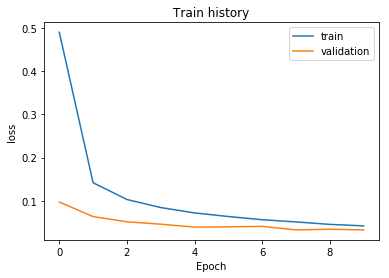

In [21]:
show_train_history(train_history,'loss','val_loss',1)

# 4.评估模型准确率
以上的步骤中，我们已经完成了训练，现在要使用 test 测试数据集来评估模型准确率。用下面的程序代码来评估模型的准确率。

In [22]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 299us/step


0.99150000000000005

从上面的执行结果可知准确率是0.989

# 5.进行预测
之前的步骤我们建立了模型，并且完成了训练模型，准确率达到0.989，接下来将使用此模型进行预测。

## 5.1 执行预测

In [23]:
prediction = model.predict_classes(x_Test4D_normalize)

## 5.2预测结果

In [24]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

## 5.3显示前10项预测结果

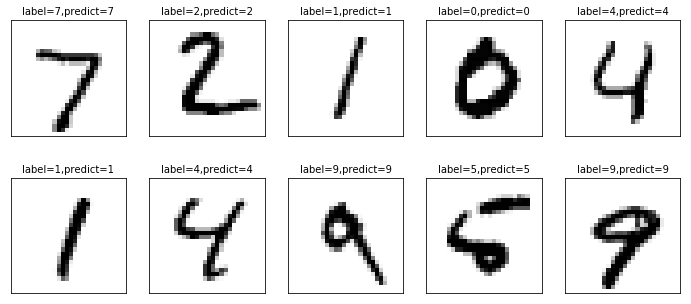

In [25]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "label=" +str(labels[idx])
        if len(prediction)>0:
            title+= ",predict="+str(prediction[idx])
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# 6.显示混淆矩阵
Pandas 提供了建立混淆矩阵的功能。

In [26]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,3,2,1023,0,1,0,0,3,0,0
3,0,0,0,1006,0,1,0,2,1,0
4,0,0,0,0,973,0,1,0,1,7
5,1,0,0,6,0,882,2,0,0,1
6,4,2,0,0,2,1,948,0,1,0
7,1,2,3,0,0,0,0,1019,1,2
8,3,0,3,2,0,2,0,2,959,3
